In [1]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'BHARTIARTL.NS.csv'
Airtel=pd.read_csv(FileName)

In [3]:
Airtel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/07/2002,15.631986,16.297667,15.379487,15.976303,15.025875,831759
1,02/07/2002,15.379487,16.343575,15.379487,16.297667,15.328119,664008
2,03/07/2002,16.527210,16.527210,16.045168,16.136984,15.176995,564071
3,04/07/2002,16.412437,16.641981,16.182894,16.527210,15.544005,1127138
4,05/07/2002,16.091076,16.274712,15.609032,15.700850,14.766807,886627


In [4]:
Airtel.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4749,23/08/2021,618.400024,630.500000,607.599976,622.650024,622.650024,12554898
4750,24/08/2021,627.950012,627.950012,617.049988,620.099976,620.099976,5776595
4751,25/08/2021,622.349976,622.349976,611.000000,612.450012,612.450012,7977884
4752,26/08/2021,610.000000,611.500000,584.299988,586.900024,586.900024,25831904
4753,27/08/2021,588.799988,605.400024,585.049988,595.150024,595.150024,16141223


In [5]:
df1=Airtel.reset_index()['Close']

In [6]:
df1.shape

(4754,)

In [7]:
df1

0        15.976303
1        16.297667
2        16.136984
3        16.527210
4        15.700850
           ...    
4749    622.650024
4750    620.099976
4751    612.450012
4752    586.900024
4753    595.150024
Name: Close, Length: 4754, dtype: float64

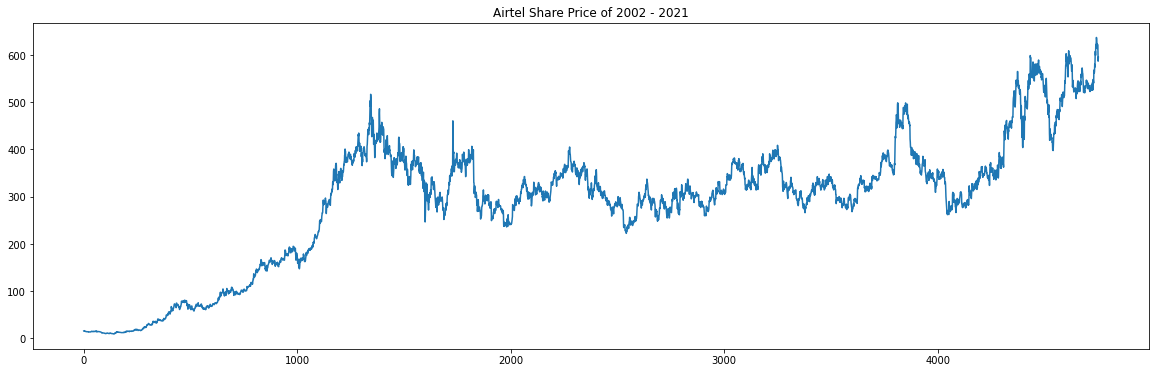

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('Airtel Share Price of 2002 - 2021')
plt.plot(df1)

In [9]:
Airtel.Date = pd.to_datetime(Airtel.Date)
Airtel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4754 non-null   datetime64[ns]
 1   Open       4754 non-null   float64       
 2   High       4754 non-null   float64       
 3   Low        4754 non-null   float64       
 4   Close      4754 non-null   float64       
 5   Adj Close  4754 non-null   float64       
 6   Volume     4754 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 260.1 KB


In [10]:
Airtel = Airtel.set_index('Date')

In [11]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     \ 306 kB 1.8 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=3911dc7ff292cbfd1dd17f196c0d0b292011d580c94f17c637dd37ab657b59b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-he45e7ga/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [12]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 777 kB/s 


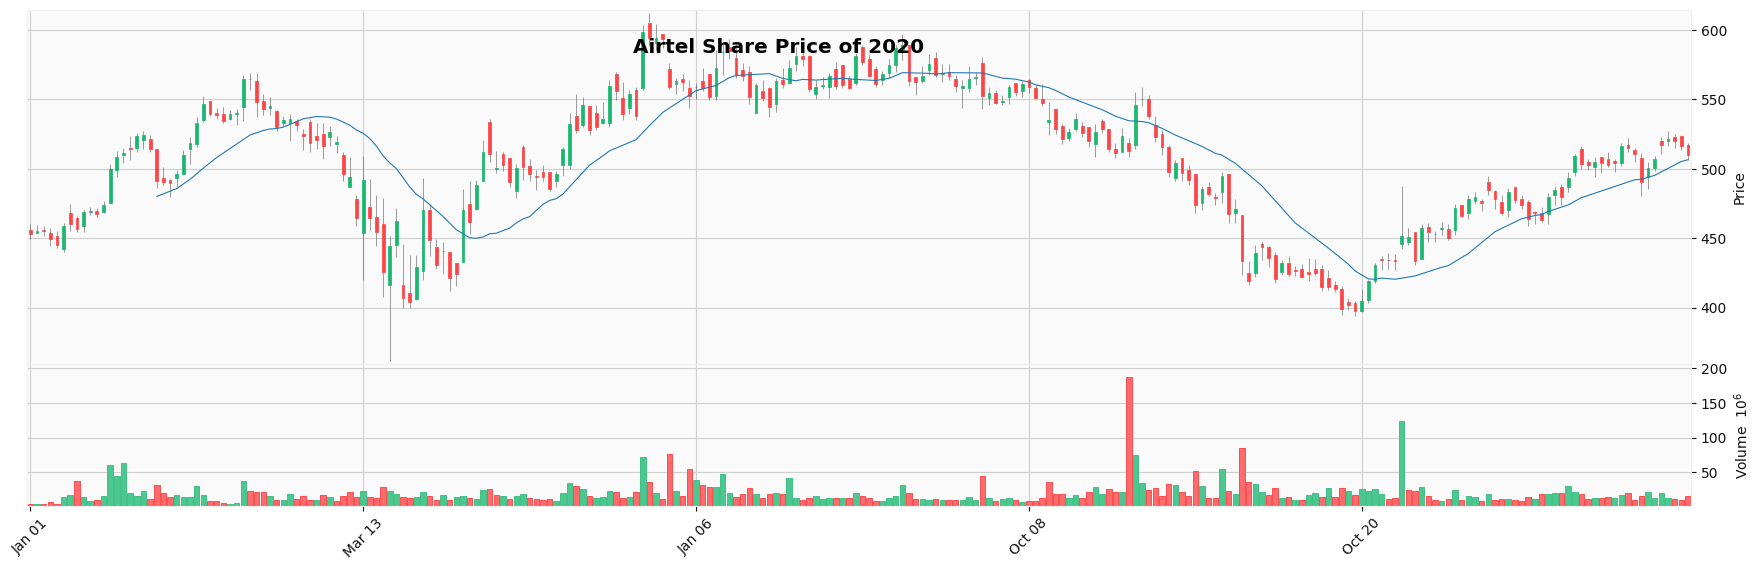

In [13]:
import mplfinance as mpf
mpf.plot(Airtel['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'Airtel Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.01027882],
       [0.01079093],
       [0.01053487],
       ...,
       [0.96079834],
       [0.92008278],
       [0.93322969]])

In [17]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size, test_size

(3565, 1189)

In [19]:
len(train_data), len(test_data)

(3565, 1189)

In [20]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(X_train)

[[0.01027882 0.01079093 0.01053487 ... 0.00278004 0.00226792 0.00164607]
 [0.01079093 0.01053487 0.01115672 ... 0.00226792 0.00164607 0.00153634]
 [0.01053487 0.01115672 0.00983986 ... 0.00164607 0.00153634 0.00153634]
 ...
 [0.5163185  0.52063485 0.5088563  ... 0.43350268 0.44103807 0.44967079]
 [0.52063485 0.5088563  0.49510241 ... 0.44103807 0.44967079 0.45757194]
 [0.5088563  0.49510241 0.4956877  ... 0.44967079 0.45757194 0.45135345]]


In [23]:
print(X_train.shape), print(y_train.shape)

(3464, 100)
(3464,)


(None, None)

In [24]:
print(X_test.shape), print(y_test.shape)

(1088, 100)
(1088,)


(None, None)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
55/55 [==============================] - 17s 217ms/step - loss: 0.0181 - val_loss: 0.0020
Epoch 2/100
55/55 [==============================] - 11s 194ms/step - loss: 7.0907e-04 - val_loss: 0.0021
Epoch 3/100
55/55 [==============================] - 11s 194ms/step - loss: 6.8567e-04 - val_loss: 0.0017
Epoch 4/100
55/55 [==============================] - 11s 196ms/step - loss: 6.1825e-04 - val_loss: 0.0022
Epoch 5/100
55/55 [==============================] - 11s 195ms/step - loss: 5.9679e-04 - val_loss: 0.0026
Epoch 6/100
55/55 [==============================] - 11s 193ms/step - loss: 5.7865e-04 - val_loss: 0.0027
Epoch 7/100
55/55 [==============================] - 11s 195ms/step - loss: 5.7556e-04 - val_loss: 0.0014
Epoch 8/100
55/55 [==============================] - 11s 196ms/step - loss: 5.1858e-04 - val_loss: 0.0015
Epoch 9/100
55/55 [==============================] - 11s 196ms/step - loss: 4.9925e-04 - val_loss: 0.0026
Epoch 10/100
55/55 [==============================

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.6.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
y_train

array([0.00153634, 0.00153634, 0.00153634, ..., 0.45757194, 0.45135345,
       0.44930498])

In [35]:
type(df1)

numpy.ndarray

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

284.753312149897

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

430.3385581225275

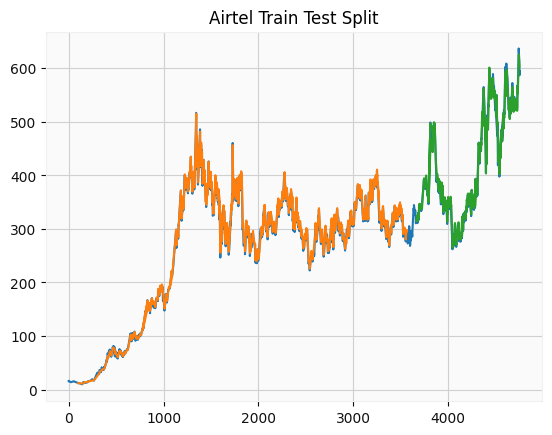

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Airtel Train Test Split')
plt.show()

In [39]:
len(test_data)

1189

In [43]:
x_input=test_data[1089:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9370497]
101
1 day input [0.83291477 0.84789422 0.85012525 0.85371077 0.81737751 0.83920937
 0.8443087  0.84653973 0.82375177 0.82972764 0.8307634  0.81761649
 0.82550465 0.83626121 0.85219686 0.84669904 0.84016547 0.87538321
 0.86518445 0.87713619 0.87522389 0.89076115 0.89721507 0.89060183
 0.88000459 0.87785331 0.86072249 0.839528   0.82654051 0.81450911
 0.83092281 0.82430948 0.82319396 0.82263625 0.81315452 0.81921005
 0.83721741 0.83403028 0.82861212 0.83267569 0.83371155 0.83968742
 0.85618077 0.84534455 0.85355145 0.84669904 0.8443087  0.84932846
 0.84016547 0.82725763 0.8433526  0.84470709 0.83960776 0.83586282
 0.82741695 0.83753605 0.8313212  0.82136142 0.82247693 0.81769624
 0.82144108 0.81976786 0.82319396 0.82877144 0.82191913 0.83936868
 0.82885119 0.82948856 0.82948856 0.8221582  0.84717719 0.84287455
 0.82263625 0.85602146 0.85857112 0.85179847 0.84622099 0.88980505
 0.88860988 0.87984527 0.88542275 0.90940588 0.90016322 0.93888683
 0.95354764 0.93976327 0.9763356  

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

4754

Text(0.5, 1.0, 'Airtel Prediction of Next 30 Days')

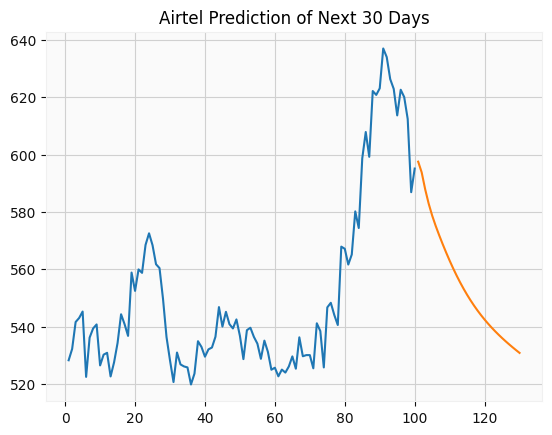

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[4654:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Airtel Prediction of Next 30 Days')

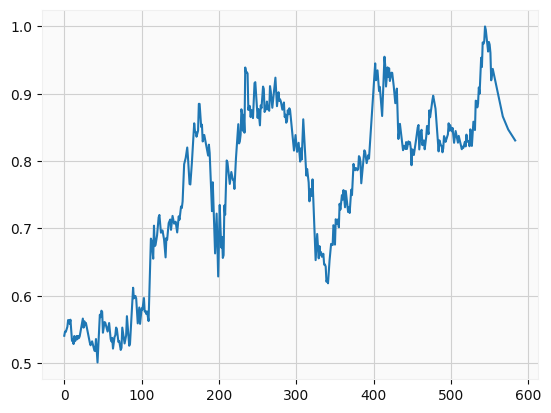

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4200:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

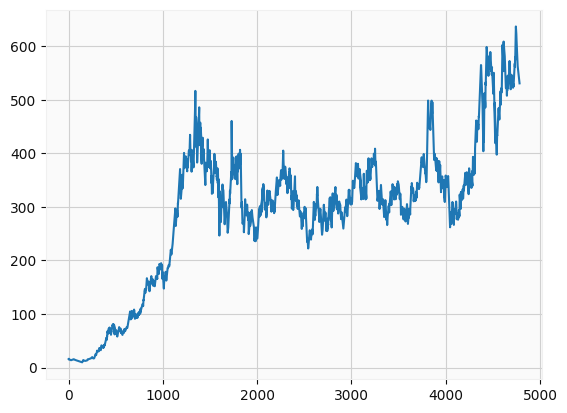

In [52]:
plt.plot(df3)